## Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [5]:
# read data
train = pd.read_csv('df1_train.csv')
x_test = pd.read_csv('df1_test1.csv')
y_test = pd.read_csv('df1_test1y.csv')
print('train :',train.shape)
print('x_test :',x_test.shape)
print('y_test :',y_test.shape)

train : (400, 44)
x_test : (50, 43)
y_test : (50, 1)


In [6]:
# 資料前處理

#原本資料
x_train = train.drop(['life_post_consumer'],axis=1)
y_train = train['life_post_consumer']
y_test = y_test['life_post_consumer'].values

# mean value of y-trainging data
mean_value = y_train.mean()
y_dmtrain = y_train - mean_value

# standardize all feature 
xscaler = StandardScaler().fit(x_train)
x_std_train = xscaler.transform(x_train)
x_std_test = xscaler.transform(x_test)

# standardize continous feature, keep binary feature
x_train_con = x_train.iloc[:,0:8].drop(['Paid'],axis=1)
x_train_bi = pd.concat([x_train['Paid'],x_train.iloc[:,8:]],axis=1)
x_test_con = x_test.iloc[:,0:8].drop(['Paid'],axis=1)
x_test_bi = pd.concat([x_test['Paid'],x_test.iloc[:,8:]],axis=1)

xscaler_con = StandardScaler().fit(x_train_con)
x_std_train_con = xscaler_con.transform(x_train_con)
x_std_test_con = xscaler_con.transform(x_test_con)

x_std_train_con = pd.DataFrame(x_std_train_con)
x_std_test_con = pd.DataFrame(x_std_test_con)
x_pstd_train = pd.concat([x_std_train_con,x_train_bi],axis=1)
x_pstd_test = pd.concat([x_std_test_con,x_test_bi],axis=1)

### Q1
**Summary statistic of key variable "life_post_consumer"**

In [23]:
train[['life_post_consumer']].describe()

,life_post_consumer
count,400.000000
mean,810.340000
std,899.037251
min,17.000000
25%,335.000000
50%,554.500000
75%,955.500000
max,11328.000000


從summary statistic得知，life_post_consumer變數的平均數為810.34，標準差是899.037，第25百分位數是335，中位數是554.5，第75百分位數是955，最小值是17，最大值是11328

**Data distribution of "life_post_consumer"**

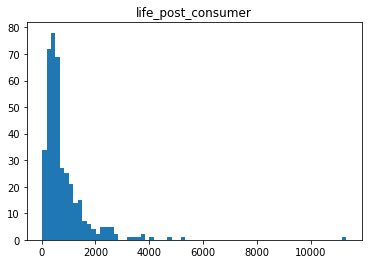

In [30]:
plt.hist(train['life_post_consumer'],bins='auto')
plt.title('life_post_consumer')
plt.show()

從life_post_consumer的分布得知，其分布呈現右偏，有長尾效應，只有少部分的post的life_post_consumer值是大於2000的

**Box plot of "life_post_consumer"**

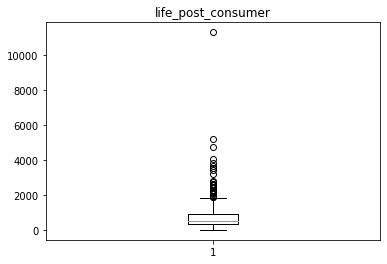

In [28]:
plt.boxplot(train['life_post_consumer'])
plt.title('life_post_consumer')
plt.show()

從箱型圖來看，life_post_consumer值大於2000的post都屬於離群值。

**continous features和key variable(life_post_consumer)之間的相關性(使用皮爾森相關係數)**

In [27]:
pd.concat([x_train_con,y_train],axis=1).corr()

,comp_page_like,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,life_post_consumer
comp_page_like,1.000000,-0.071755,-0.110348,-0.082109,0.014300,0.047125,-0.028101,-0.165473
life_post_reach,-0.071755,1.000000,0.322040,0.759688,0.326347,0.523480,0.399390,0.481325
life_post_impression_liked,-0.110348,0.322040,1.000000,0.594565,0.303182,0.285076,0.239867,0.210418
life_post_reach_liked,-0.082109,0.759688,0.594565,1.000000,0.454407,0.652568,0.517092,0.478766
comment,0.014300,0.326347,0.303182,0.454407,1.000000,0.660664,0.663120,0.300871
like,0.047125,0.523480,0.285076,0.652568,0.660664,1.000000,0.818850,0.306460
share,-0.028101,0.399390,0.239867,0.517092,0.663120,0.818850,1.000000,0.341959
life_post_consumer,-0.165473,0.481325,0.210418,0.478766,0.300871,0.306460,0.341959,1.000000


從上表得知可以看feauture之間的相關性，以及feature和life_post_consumer的相關性。和life_post_consumer線性相關程度最高的feature是life_post_reach，
但也不算是高度相關，係數只有0.481325。而feature之間相關係數最高的組合是life_post_reach_liked和life_post_reach，相關係數達0.76。feature之間無高度線性相關(係數大於0.8)的組合，比較不用擔心共線性的問題。

### Q2 (Case 1)
Construct a prediction model using the setting of Case 1 (
Method : ymean,
x_continue : not used,
x_binary : not used,
y : keep )

In [8]:
#Case1
class ymean:
    def fit(self,y_train):
        self.y_train = y_train
    
    def predict(self,x_test):
        mean_value = self.y_train.mean()
        y_pred = np.full(len(x_test),mean_value)
        return y_pred

m1 = ymean()
m1.fit(y_train)
y_pred1 = m1.predict(x_test)
rms1 = sqrt(mean_squared_error(y_test, y_pred1))
print('RMSE (Case 1) : ',rms1)
print('First 20 predictions : \n',y_pred1[0:20])
print('First 20 true outcome values : \n',y_test[0:20])

RMSE (Case 1) :  928.8095109332162
First 20 predictions : 
 [810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34
 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34]
First 20 true outcome values : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


The RMSE suggest that the average error is 928.8095109332162

### Q3 (Case 2A)
Construct a prediction model using the setting of Case 2A (
Method : OLS,
x_continue : keep,
x_binary : keep,
y : keep )

In [9]:
#Case2A
m2a = LinearRegression(fit_intercept=True).fit(x_train,y_train)
#print('constant term : ',m2a.intercept_)
y_pred2a = m2a.predict(x_test)
rms2a = sqrt(mean_squared_error(y_test, y_pred2a))
print('RMSE(Case 2A) : ',rms2a)
print('First 20 predictions : \n',y_pred2a[0:20])
print('First 20 true outcome values : \n',y_test[0:20])

RMSE(Case 2A) :  692.2891271360107
First 20 predictions : 
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071217 4288.223081  ]
First 20 true outcome values : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


The RMSE suggest that the average error is 692.2891271360107

### Q4 (Case 2B)
Construct a prediction model using the setting of Case 2B (
Method : OLS,
x_continue : keep,
x_binary : keep,
y : de-mean )

In [11]:
#Case2B
m2b = LinearRegression(fit_intercept=True).fit(x_train,y_dmtrain)
#print('constant term : ',m2b.intercept_)
y_pred2b = m2b.predict(x_test)
y_pred2b = y_pred2b + mean_value
rms2b = sqrt(mean_squared_error(y_test, y_pred2b))
print('RMSE : ',rms2b)
print('First 20 predictions : \n',y_pred2b[0:20])
print('First 20 true outcome values : \n',y_test[0:20])

RMSE :  692.2891271360899
First 20 predictions : 
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071218 4288.223081  ]
First 20 true outcome values : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


The RMSE suggest that the average error is 692.2891271360899

### Q5 (Case 2C)
Construct a prediction model using the setting of Case 2C (
Method : OLS,
x_continue : std.,
x_binary : std.,
y : de-mean )

In [12]:
m2c = LinearRegression(fit_intercept=True).fit(x_std_train,y_dmtrain)
#print('constant term : ',m2c.intercept_)
y_pred2c = m2c.predict(x_std_test)
y_pred2c = y_pred2c + mean_value
rms2c = sqrt(mean_squared_error(y_test,y_pred2c))
print("RMSE : ",rms2c)
print('First 20 predictions :\n',y_pred2c[0:20])
print('First 20 true outcome values : \n',y_test[0:20])

RMSE :  692.2891271372004
First 20 predictions :
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244767  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.72913809 1983.53858871 3144.39710045 4060.61071219 4288.223081  ]
First 20 true outcome values : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


The RMSE suggest that the average error is 692.2891271372004

### Q6 (Case 3A)
Construct a prediction model using the setting of Case 3A
(Method : Ridge,
x_continue : keep ,
x_binary : keep ,
y : keep )
and consider the following values for the regularization coefficient ( α ):
0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000

rmse (alpha=0.01) = 691.756420
rmse (alpha=0.10) = 690.479473
rmse (alpha=1.00) = 684.059294
rmse (alpha=5.00) = 666.374364
rmse (alpha=10.00) = 660.561290
rmse (alpha=20.00) = 664.869714
rmse (alpha=50.00) = 690.419347
rmse (alpha=100.00) = 717.128279
rmse (alpha=500.00) = 763.708959
rmse (alpha=1000.00) = 773.601948


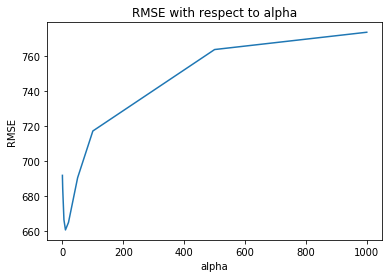

Best alpha =   10
Best test RMSE (Case3A)： 660.5612900111673
First 20 predictions : 
 [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]
First 20 true outcome values : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [18]:
#Case3A
alphas = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rms3a = []
for a in alphas:
    m3a = Ridge(alpha=a)
    m3a.fit(x_train,y_train)
    y_pred3a = m3a.predict(x_test)
    rms = sqrt(mean_squared_error(y_test,y_pred3a))
    print('rmse (alpha=%.2f) = %f' % (a,rms))
    rms3a.append(rms)
plt.plot(alphas,rms3a)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE with respect to alpha')
plt.show()

best_alpha = alphas[rms3a.index(min(rms3a))]
print('Best alpha =  ',best_alpha)
m3a = Ridge(alpha=best_alpha)
m3a.fit(x_train,y_train)
y_pred3a = m3a.predict(x_test)
rms = sqrt(mean_squared_error(y_test,y_pred3a))
print('Best test RMSE (Case3A)：',rms)
print('First 20 predictions : \n',y_pred3a[0:20])
print('First 20 true outcome values : \n',y_test[0:20])

The best test RMSE suggest that the best average error is 660.5612900111673

### Q7 (Case 3B)
Construct a prediction model using the setting of Case 3B 
(Method : Ridge, 
x_continue : std ,
x_binary : keep ,
y : de-mean ) 
and consider the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000

rmse (alpha=0.01) = 691.730475
rmse (alpha=0.10) = 690.305230
rmse (alpha=1.00) = 681.813136
rmse (alpha=5.00) = 657.246897
rmse (alpha=10.00) = 646.360822
rmse (alpha=20.00) = 645.516812
rmse (alpha=50.00) = 666.500310
rmse (alpha=100.00) = 692.059933
rmse (alpha=500.00) = 752.843211
rmse (alpha=1000.00) = 785.497803


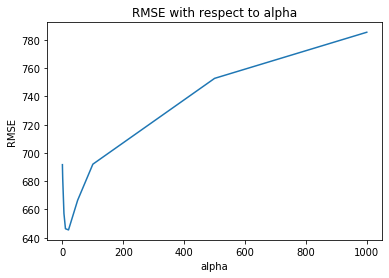

Best alpha =   20
Best test RMSE(Case 3B)： 645.516812393874
First 20 predictions : 
 [1142.26954234  254.15701492 1834.02488944   15.7181687   599.76366292
  635.94038984  427.85644416  603.66205989  514.52378787  580.00106007
  544.34176021  477.18442084  801.54554542  557.45287238  396.27886548
  615.15152412 1474.67417376 2504.86437273 3524.85964481 3438.40343713]
First 20 true outcome values : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [19]:
#Case3B
rms3b = []
for a in alphas:
    m3b = Ridge(alpha=a)
    m3b.fit(x_pstd_train,y_dmtrain)
    y_pred3b = m3b.predict(x_pstd_test)
    y_pred3b = y_pred3b + mean_value
    rms = sqrt(mean_squared_error(y_test,y_pred3b))
    print('rmse (alpha=%.2f) = %f' % (a,rms))
    rms3b.append(rms)
plt.plot(alphas,rms3b)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE with respect to alpha')
plt.show()

best_alpha = alphas[rms3b.index(min(rms3b))]
print('Best alpha =  ',best_alpha)
m3b = Ridge(alpha=best_alpha)
m3b.fit(x_pstd_train,y_dmtrain)
y_pred3b = m3b.predict(x_pstd_test)
y_pred3b+=mean_value
rms = sqrt(mean_squared_error(y_test,y_pred3b))
print('Best test RMSE(Case 3B)：',rms)
print('First 20 predictions : \n',y_pred3b[0:20])
print('First 20 true outcome values : \n',y_test[0:20])

The best test RMSE suggest that the best average error is 645.516812393874

### Q8 (Case 3C)
Construct a prediction model using the setting of Case 3C 
(Method : Ridge, 
x_continue : keep , 
x_binary : keep , 
y : de-mean)
and consider the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000

rmse (alpha=0.01) = 691.756420
rmse (alpha=0.10) = 690.479473
rmse (alpha=1.00) = 684.059294
rmse (alpha=5.00) = 666.374364
rmse (alpha=10.00) = 660.561290
rmse (alpha=20.00) = 664.869714
rmse (alpha=50.00) = 690.419347
rmse (alpha=100.00) = 717.128279
rmse (alpha=500.00) = 763.708959
rmse (alpha=1000.00) = 773.601948


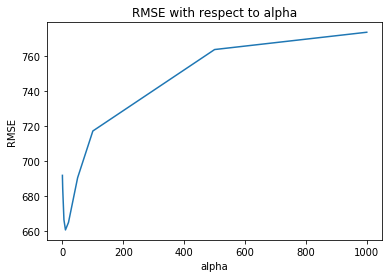

Best alpha =   10
Best test RMSE(Case 3C)： 660.5612900111672
First 20 predictions : 
 [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]
First 20 true outcome values : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [20]:
#Case3C
rms3c = []
for a in alphas:
    m3c = Ridge(alpha=a)
    m3c.fit(x_train,y_dmtrain)
    y_pred3c = m3c.predict(x_test)
    y_pred3c = y_pred3c + mean_value
    rms = sqrt(mean_squared_error(y_test,y_pred3c))
    print('rmse (alpha=%.2f) = %f' % (a,rms))
    rms3c.append(rms)

plt.plot(alphas,rms3c)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE with respect to alpha')
plt.show()

best_alpha = alphas[rms3c.index(min(rms3c))]
print('Best alpha =  ',best_alpha)
m3c = Ridge(alpha=best_alpha)
m3c.fit(x_train,y_dmtrain)
y_pred3c = m3c.predict(x_test)
y_pred3c+=mean_value
rms = sqrt(mean_squared_error(y_test,y_pred3c))
print('Best test RMSE(Case)：',rms)
print('First 20 predictions : \n',y_pred3c[0:20])
print('First 20 true outcome values : \n',y_test[0:20])

The best test RMSE suggest that the best average error is 660.5612900111672

### Q9 (Case 3D)
Construct a prediction model using the setting of Case 3D (
Method : Ridge,
x_continue : std.,
x_binary : std., 
y : de-mean) and consider the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000

rmse (alpha=0.01) = 692.208764
rmse (alpha=0.10) = 691.585882
rmse (alpha=1.00) = 688.609767
rmse (alpha=5.00) = 678.530595
rmse (alpha=10.00) = 666.451781
rmse (alpha=20.00) = 646.651506
rmse (alpha=50.00) = 611.088491
rmse (alpha=100.00) = 588.793466
rmse (alpha=500.00) = 636.312847
rmse (alpha=1000.00) = 701.463399


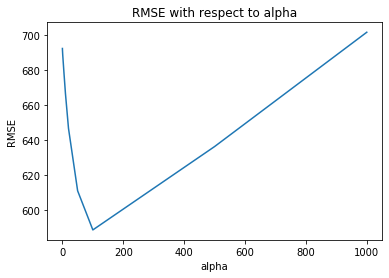

Best alpha =   100
Best test RMSE(Case 3D)： 588.793465752767
First 20 predictions : 
 [1040.50012261  278.4650498  1997.72446427  -21.14036502  554.2152571
  602.8406419   337.52346959  599.43578526  470.29370416  500.7241404
  511.14861912  387.7435535   700.08957652  532.22280969  255.18311778
  653.3563783  1728.16919169 2775.00271095 3174.79225189 3141.85797609]
First 20 true outcome values : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [21]:
#Case3D
rms3d = []
for a in alphas:
    m3d = Ridge(alpha=a)
    m3d.fit(x_std_train,y_dmtrain)
    y_pred3d = m3d.predict(x_std_test)
    y_pred3d = y_pred3d + mean_value
    rms = sqrt(mean_squared_error(y_test,y_pred3d))
    print('rmse (alpha=%.2f) = %f' % (a,rms))
    rms3d.append(rms)

plt.plot(alphas,rms3d)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE with respect to alpha')
plt.show()

best_alpha = alphas[rms3d.index(min(rms3d))]
print('Best alpha =  ',best_alpha)
m3d = Ridge(alpha=best_alpha)
m3d.fit(x_std_train,y_dmtrain)
y_pred3d = m3d.predict(x_std_test)
y_pred3d+=mean_value
rms = sqrt(mean_squared_error(y_test,y_pred3d))
print('Best test RMSE(Case 3D)：',rms)
print('First 20 predictions : \n',y_pred3d[0:20])
print('First 20 true outcome values : \n',y_test[0:20])

The best test RMSE suggest that the best average error is 588.793465752767

### Q10 (Case 4)
Construct a prediction model using the setting of Case 4 (
Method : Lasso,
x_continue : std.,
x_binary : keep, 
y : de-mean) 
and consider the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000

rmse (alpha=0.01) = 692.017941
rmse (alpha=0.10) = 690.239448
rmse (alpha=1.00) = 679.485562
rmse (alpha=5.00) = 654.313379
rmse (alpha=10.00) = 643.385504
rmse (alpha=20.00) = 650.127684
rmse (alpha=50.00) = 687.570212
rmse (alpha=100.00) = 800.143046
rmse (alpha=500.00) = 928.809511
rmse (alpha=1000.00) = 928.809511


D:\Users\yu_hsuan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


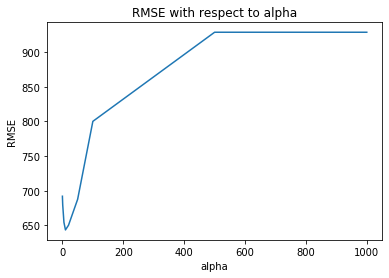

Best alpha =   10
Best test RMSE(Case 4)： 643.3855039398904
First 20 predictions : 
 [1241.59590808  287.88687291 2119.91304749  -16.30084673  449.0998835
  711.14968275  398.05844487  460.15622194  645.44772139  591.43302333
  429.96440761  461.47899154  899.80825511  571.86503726  352.8634346
  548.08990161 1741.0145297  2712.05680529 3681.4712297  3645.13497432]
First 20 true outcome values : 
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [22]:
#Case4
rms4 = []
for a in alphas:
    m4 = Lasso(alpha=a)
    m4.fit(x_pstd_train,y_dmtrain)
    y_pred4 = m4.predict(x_pstd_test)
    y_pred4+=mean_value
    rms = sqrt(mean_squared_error(y_test,y_pred4))
    print('rmse (alpha=%.2f) = %f' % (a,rms))
    rms4.append(rms)

plt.plot(alphas,rms4)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE with respect to alpha')
plt.show()

best_alpha = alphas[rms4.index(min(rms4))]
print('Best alpha =  ',best_alpha)
m4 = Lasso(alpha=best_alpha)
m4.fit(x_pstd_train,y_dmtrain)
y_pred4 = m4.predict(x_pstd_test)
y_pred4+=mean_value
rms = sqrt(mean_squared_error(y_test,y_pred4))
print('Best test RMSE(Case 4)：',rms)
print('First 20 predictions : \n',y_pred4[0:20])
print('First 20 true outcome values : \n',y_test[0:20])

The best test RMSE suggest that the best average error is 643.3855039398904

### Q11
**Summarize the best RMSE of all cases**

|Case|Method|x_continue|x_binary|y|Best RMSE|
|----|----|----|----|----|----|
|1|ymean|not used|not used|keep|928.8095109332162|
|2A|OLS|keep|keep|keep|692.2891271360107|
|2B|OLS|keep|keep|de-mean|692.2891271360899|
|2C|OLS|std.|std.|de-mean|692.2891271372004|
|3A|Ridge|keep|keep|keep|660.5612900111673|
|3B|Ridge|std.|keep|de-mean|645.516812393874|
|3C|Ridge|keep|keep|de-mean|660.5612900111672|
|3D|Ridge|std.|std.|de-mean|588.793465752767|
|4|Lasso|std.|keep|de-mean|643.3855039398904|


在所有case中，表現最好的是Case 3C，也就是使用Ridge model，把所有feature做標準化，對outcome value做de-mean的組合表現最佳(RMSE=588.7935)。</br>

Case 1被視為base line model，其RMSE為928.8095，其他case的模型的RMSE都小於case 1，所以不論是用OLS、Ridge還是Lasso regression，對於預測outcome value都是有幫助的。</br>

在outcome value的處理上，可以看到不管是OLS還是Ridge regression，有沒有做de-mean對預測成效沒甚麼影響。</br>

在feature 標準化的處理上，可以看到OLS有沒有做feature標準化，對預測成效沒什麼影響；而Ridge regression有做feature標準化，預測成效比沒做標準化還要好。而在選擇哪些feature做標準化上，可以看到把所有feature做標準化，會比只對continuous feature做標準化的預測成效還要好。</br>

而在方法選擇上，Ridge 和 Lasso regression表現的都比OLS還要好，看起來在這個資料上，在回歸上有做regularization會比沒做的預測成效還要好。</br>

**How should we preprocess the features?** </br>

若是用OLS，可以不做feature 標準化。</br>
若是用Ridge Regression，對所有feature做標準化會是最好的。</br>
因為Lasso Regression只有做一種setting，所以無法根據上面的表格，判別怎麼做feature preprocessing會是最好的。